![](MonteCarlitos1.jpg)

In [46]:
import numpy as np
n=100000
def f1(x):
    return np.log(1.5+np.sin(x**2))/(x*np.exp(-x**2))


def montecarlo_tipo1(f,a,b,n):
    u=np.random.uniform(a,b,n)
    return np.mean(f(u))*(b-a)
a1=montecarlo_tipo1(f1,0.1,0.3,n)
a2=montecarlo_tipo1(f1,0.3,0.5,n)
a3=montecarlo_tipo1(f1,0.5,0.7,n)
a4=montecarlo_tipo1(f1,0.7,0.9,n)
a5=montecarlo_tipo1(f1,0.9,1.1,n)

In [48]:
import pandas as pd
tabla=pd.DataFrame(columns=["Intervalo1","Intervalo2","Intervalo3","Intervalo4","Intervalo5"])

tabla.loc[1,"Intervalo1"]=a1
tabla.loc[1,"Intervalo2"]=a2
tabla.loc[1,"Intervalo3"]=a3
tabla.loc[1,"Intervalo4"]=a4
tabla.loc[1,"Intervalo5"]=a5
tabla

,Intervalo1,Intervalo2,Intervalo3,Intervalo4,Intervalo5
1,0.489413,0.302222,0.296827,0.353533,0.465271


In [4]:
#y(0.1)=0.1
y3=0.1+a1
y3

0.589717625334348

In [5]:
y5=y3+a2
y5

0.8917427186992184

In [6]:
y7=y5+a3
y7

1.1885871755457118

In [7]:
y9=y7+a4
y9

1.541935231190832

In [8]:
y11=y9+a5
y11

2.007358112395831

![](MonteCarlitos2.jpg)

In [10]:
def f2 (x,y):
    return x*y*np.exp(-x**2-y**2)>0.05
def f3(x,y):
    return np.exp(-0.05*(x**2+y**2))*np.sin(x**2+y**2)>0.5
n=100000
def montecarlo_tipo_2 (region,ax,bx,ay,by,n):
    x=np.random.uniform(ax,bx,n)
    y=np.random.uniform(ay,by,n)
    AR=(bx-ax)*(by-ay)
    return region(x,y).mean()*AR
MT2_F2=montecarlo_tipo_2(f2,-1,1,-1,1,n)
MT2_F3=montecarlo_tipo_2(f3,-1,1,-1,1,n)

In [11]:
MT2_F2,MT2_F3

(1.45924, 2.29196)

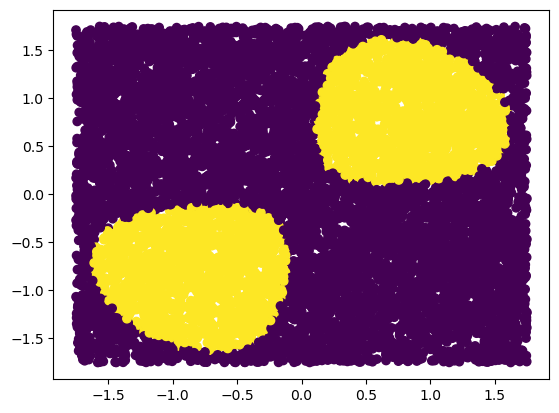

In [12]:
ax=-1.75
bx=1.75
ay=-1.75
by=1.75
n=10000
x=np.random.uniform(ax,bx,n)
y=np.random.uniform(ay,by,n)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y,c=f2(x,y))

In [38]:
n1=10000
n2=100000
n3=1000000
#Para 10 mil, 100 mil y 1 millon
MT2_F2_n1=montecarlo_tipo_2(f2,-1.75,1.75,-1.75,1.75,n1)
MT2_F2_n2=montecarlo_tipo_2(f2,-1.75,1.75,-1.75,1.75,n2)
MT2_F2_n3=montecarlo_tipo_2(f2,-1.75,1.75,-1.75,1.75,n3)
MT2_F2_n1,MT2_F2_n2,MT2_F2_n3

(3.6394749999999996, 3.6687524999999996, 3.669659)

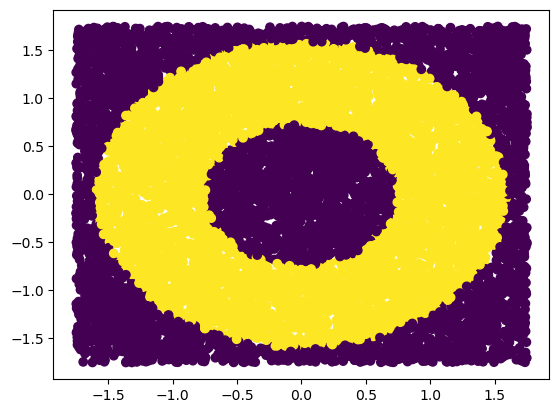

In [14]:
ax=-1.75
bx=1.75
ay=-1.75
by=1.75
n=10000
x=np.random.uniform(ax,bx,n)
y=np.random.uniform(ay,by,n)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y,c=f3(x,y))

In [32]:
MT2_F3_n1=montecarlo_tipo_2(f3,-1.75,1.75,-1.75,1.75,n1)
MT2_F3_n2=montecarlo_tipo_2(f3,-1.75,1.75,-1.75,1.75,n2)
MT2_F3_n3=montecarlo_tipo_2(f3,-1.75,1.75,-1.75,1.75,n3)
MT2_F3_n1,MT2_F3_n2,MT2_F3_n3

(6.2364749999999995, 6.267835, 6.277488)

In [42]:
#Tabla del Dataframe
tabla2=pd.DataFrame(columns=["Número de Puntos","Función1","Función2"])

tabla2.loc[1,"Número de Puntos"]=n1
tabla2.loc[2,"Número de Puntos"]=n2
tabla2.loc[3,"Número de Puntos"]=n3

tabla2.loc[1,"Función1"]=MT2_F2_n1
tabla2.loc[2,"Función1"]=MT2_F2_n2
tabla2.loc[3,"Función1"]=MT2_F2_n3


tabla2.loc[1,"Función2"]=MT2_F3_n1
tabla2.loc[2,"Función2"]=MT2_F3_n2
tabla2.loc[3,"Función2"]=MT2_F3_n3
tabla2

,Número de Puntos,Función1,Función2
1,10000,3.639475,6.236475
2,100000,3.668752,6.267835
3,1000000,3.669659,6.277488


In [54]:
AR=(bx-ax)*(by-ay)
Crel=np.sqrt((1-MT2_F2_n3/AR)/(MT2_F2_n3/AR))
Error_relativof1=np.log10(Crel)-np.log10(n)/2
Error_relativof1

-2.3155605808736497

In [52]:
AR=(bx-ax)*(by-ay)
Crel=np.sqrt((1-MT2_F3_n3/AR)/(MT2_F3_n3/AR))
Error_relativof2=np.log10(Crel)-np.log10(n)/2
Error_relativof2

-2.5108144300911213